In [1]:
#x是特征，y是标签

from sklearn import datasets
import numpy as np

x, y = datasets.make_moons(n_samples=50000, noise=0.3, random_state=42)
print(x.shape)
print(y.shape)
print(np.unique(y))

(50000, 2)
(50000,)
[0 1]


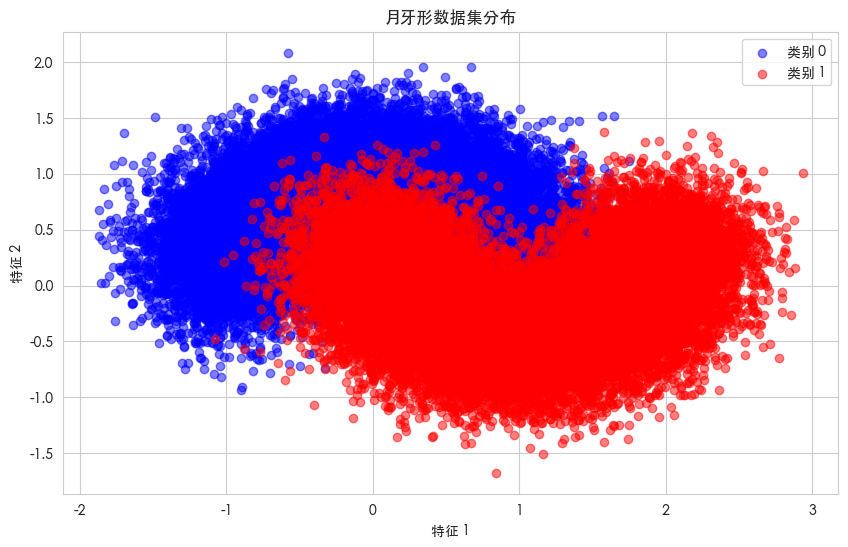

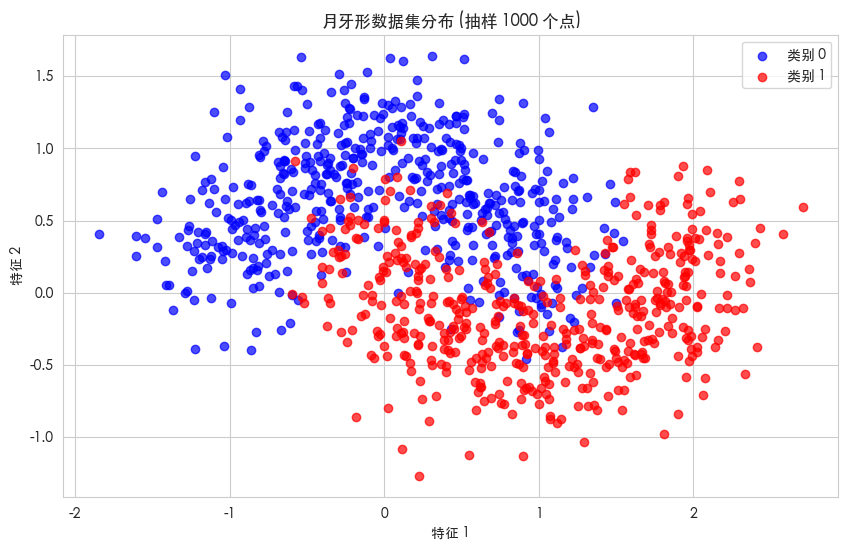

In [17]:
# 导入必要的库
import matplotlib.pyplot as plt


# 将样本数据可视化
# 设置中文显示
import matplotlib.font_manager as font_manager
font_path = ('/System/Library/Fonts/STHeiti Light.ttc')
my_font = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = my_font.get_name()
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 6))
#x[y == 0, 0] , due to first and second elements, row and column respectively, means accessing the first feature(column) of the sample rows  with label 0 (y==0)
plt.scatter(x[y == 0, 0], x[y == 0, 1], color='blue', alpha=0.5, label='类别 0')
#x[y == 1, 0]表示y为1的样本的第一个特征，x[y == 1, 1]表示y为1的样本的第二个特征
plt.scatter(x[y == 1, 0], x[y == 1, 1], color='red', alpha=0.5, label='类别 1')
plt.title('月牙形数据集分布')
plt.xlabel('特征 1')
plt.ylabel('特征 2')
plt.legend()
plt.grid(True)
plt.show()

# 为了更好地理解数据分布，我们也可以只绘制一部分样本点
sample_size = 1000
plt.figure(figsize=(10, 6))
# x and y are numpy.ndarray, slicing with [start:stop]
# x[:sample_size],  [:sample_size] get all rows from 0 to sample_size (1000)
# y[:sample_size] == 0, return a boolean array with first 1000 rows,and every element is True if y is 0, otherwise False.
#x[:sample_size][y[:sample_size] == 0, 0], return first 1000 rows with y being 0, and the first column(0) of those rows.

plt.scatter(x[:sample_size][y[:sample_size] == 0, 0], x[:sample_size][y[:sample_size] == 0, 1], 
            color='blue', alpha=0.7, label='类别 0')
plt.scatter(x[:sample_size][y[:sample_size] == 1, 0], x[:sample_size][y[:sample_size] == 1, 1], 
            color='red', alpha=0.7, label='类别 1')
plt.title('月牙形数据集分布 (抽样 {} 个点)'.format(sample_size))
# x and y axes are features.
plt.xlabel('特征 1')
plt.ylabel('特征 2')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
x

array([[ 0.71820567, -0.21809028],
       [ 0.11096372,  1.10964541],
       [ 0.61562814, -0.06539887],
       ...,
       [ 1.58004352, -0.3637176 ],
       [ 0.90929791, -0.09962261],
       [-0.97512015,  0.87195198]])

# Bagging并行集成学习实战

训练逻辑回归分类器...
训练SVC分类器...
训练决策树分类器...
逻辑回归分类器准确率: 0.8535
SVC分类器准确率: 0.9123
决策树分类器准确率: 0.9054
训练投票分类器...
投票分类器准确率: 0.9123

投票分类器分类报告:


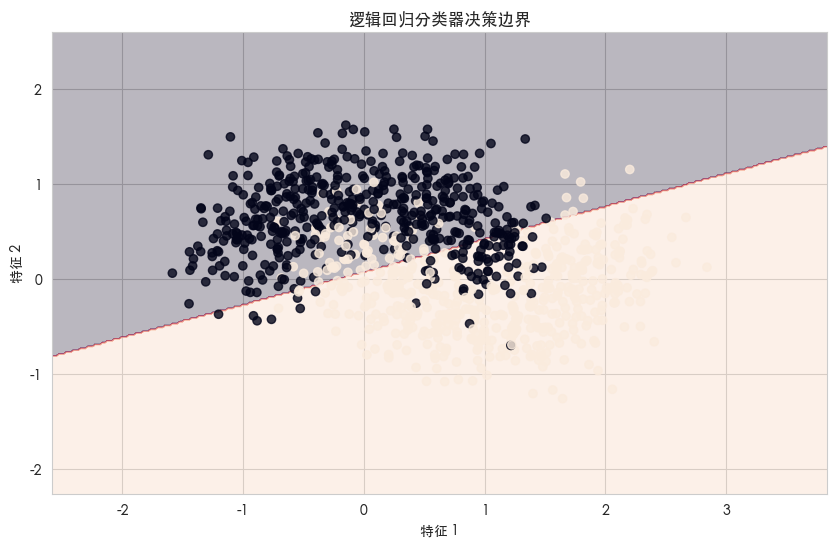

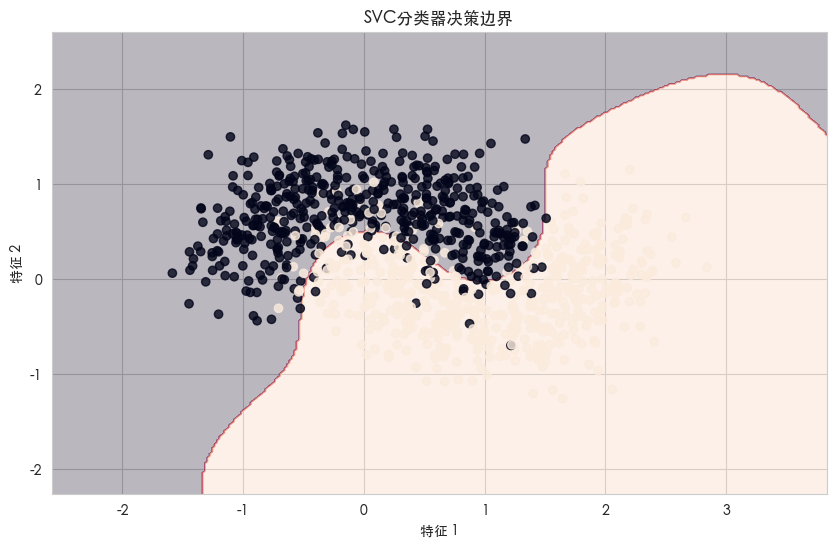

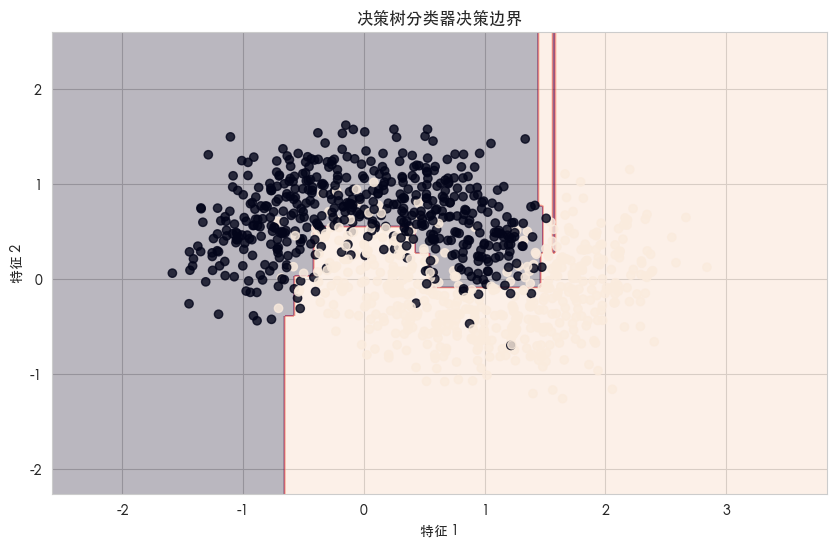

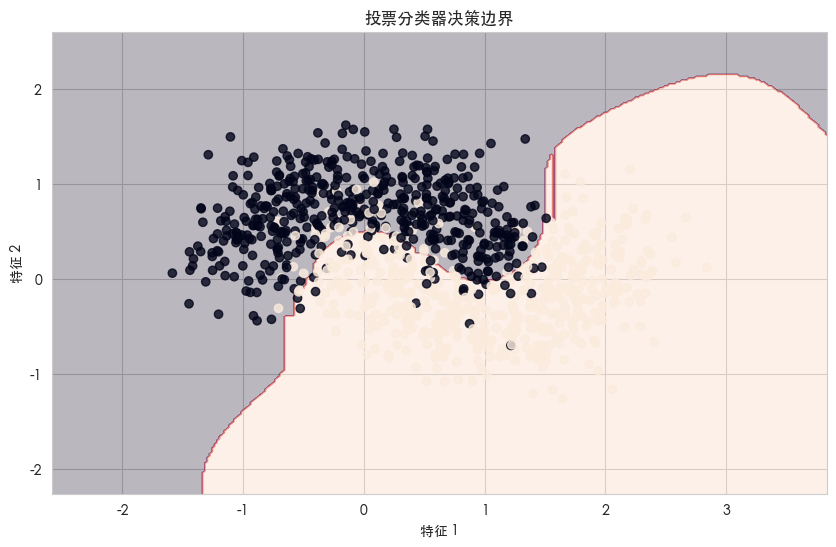

In [18]:
from sklearn.ensemble import VotingClassifier

# 导入必要的分类器
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 创建三个基分类器
lr_clf = LogisticRegression(max_iter=1000)
svc_clf = SVC(kernel='rbf', probability=True)
dt_clf = DecisionTreeClassifier(max_depth=5)

# 训练三个基分类器
"""
No matter what the model is — .fit(X, y) always means:

“Use X and y to learn or train the model."
Training Means: Find Best w and b.Search for the best w and b so that predicted y is close to true y.
"""
print("训练逻辑回归分类器...")
lr_clf.fit(X_train, y_train)
print("训练SVC分类器...")
svc_clf.fit(X_train, y_train)
print("训练决策树分类器...")
dt_clf.fit(X_train, y_train)

# 在测试集上评估各个基分类器
# using founded w and b to predict y
lr_pred = lr_clf.predict(X_test)
svc_pred = svc_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)

print("逻辑回归分类器准确率:", accuracy_score(y_test, lr_pred))
print("SVC分类器准确率:", accuracy_score(y_test, svc_pred))
print("决策树分类器准确率:", accuracy_score(y_test, dt_pred))

# 创建投票分类器（硬投票）
# combines the predictions of all three models using hard voting
voting_clf = VotingClassifier(
    estimators=[
        ('lr', lr_clf),
        ('svc', svc_clf),
        ('dt', dt_clf)
    ],
    # hard means majority rule voting
    voting='hard'
)

# 重新训练投票分类器
print("训练投票分类器...")
voting_clf.fit(X_train, y_train)

# 评估投票分类器
voting_pred = voting_clf.predict(X_test)
print("投票分类器准确率:", accuracy_score(y_test, voting_pred))
print("\n投票分类器分类报告:")


# 可视化不同分类器的决策边界
def plot_decision_boundary(clf, X, y, title):
    h = 0.02  # 网格步长
    # -1 and +1 to add some margins to the data plot.otherwise Points near the edge would be cut off and The decision boundary might not be fully visible.
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
   
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 6))
    #plt.contourf(...): fills regions of the plot with colors according to the class predicted by Z
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.title(title)
    plt.xlabel('特征 1')
    plt.ylabel('特征 2')
    plt.show()

# 使用测试集的一个子集可视化决策边界（为了加快绘图速度）
X_sample = X_test[:1000]
y_sample = y_test[:1000]

plot_decision_boundary(lr_clf, X_sample, y_sample, "逻辑回归分类器决策边界")
plot_decision_boundary(svc_clf, X_sample, y_sample, "SVC分类器决策边界")
plot_decision_boundary(dt_clf, X_sample, y_sample, "决策树分类器决策边界")
plot_decision_boundary(voting_clf, X_sample, y_sample, "投票分类器决策边界")


In [19]:
# lr_pred = lr_clf.predict(X_test)
# svc_pred = svc_clf.predict(X_test)
# dt_pred = dt_clf.predict(X_test)

ensemble_pred = np.array((lr_pred + svc_pred + dt_pred) >= 2, dtype='int')

# 计算手动集成学习的准确率
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print("手动集成学习准确率:", ensemble_accuracy)




手动集成学习准确率: 0.9123


In [20]:
# 使用软投票方式创建集成分类器
# 软投票使用预测的概率而不是类标签进行投票
soft_voting_clf = VotingClassifier(
    estimators=[
        ('lr', lr_clf),
        ('svc', svc_clf),
        ('dt', dt_clf)
    ],
    voting='soft'  # 使用软投票
)

# 由于SVC默认不返回概率，我们需要确保已经设置probability=True
# 如果没有设置，可以重新训练
if not hasattr(svc_clf, 'predict_proba'):
    print("重新训练SVC以启用概率预测")
    svc_clf = SVC(probability=True, gamma='auto')
    svc_clf.fit(X_train, y_train)
    
    # 更新集成分类器中的SVC
    soft_voting_clf.estimators[1] = ('svc', svc_clf)

# 训练软投票分类器
soft_voting_clf.fit(X_train, y_train)

# 评估软投票分类器
soft_voting_pred = soft_voting_clf.predict(X_test)
soft_voting_accuracy = accuracy_score(y_test, soft_voting_pred)
print("软投票集成分类器准确率:", soft_voting_accuracy)

# 比较各个分类器在测试集上的准确率
print("逻辑回归准确率:", accuracy_score(y_test, lr_pred))
print("SVC准确率:", accuracy_score(y_test, svc_pred))
print("决策树准确率:", accuracy_score(y_test, dt_pred))




软投票集成分类器准确率: 0.9078
逻辑回归准确率: 0.8535
SVC准确率: 0.9123
决策树准确率: 0.9054


In [9]:
print("手动集成准确率:", ensemble_accuracy)
print("软投票集成准确率:", soft_voting_accuracy)

手动集成准确率: 0.9123
软投票集成准确率: 0.9079


# BaggingClassifier bootstrap=True有放回抽样

In [24]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

# 创建一个决策树作为基分类器
base_clf = DecisionTreeClassifier(random_state=42)

# 创建Bagging分类器，使用决策树作为基本分类器
bagging_clf = BaggingClassifier(
    estimator=base_clf,
    n_estimators=100,  # 使用100个基分类器
    #bootstrap:Whether samples are drawn with replacement. If False, sampling without replacement is performed.
    #Whether to use out-of-bag samples to estimate the generalization error. Only available if bootstrap=True
    #ob_score:The samples not selected in the bootstrap for a specific tree are called its Out-of-Bag samples.They are not used to train that specific tree.So, they can be used to test or validate that tree.
    bootstrap=True,    # 使用有放回抽样
    oob_score=True,
    random_state=42
)

# 训练Bagging分类器
bagging_clf.fit(X_train, y_train)

#查oob score,oob score是没有抽样到的样本的准确率
print(f'oob score:{bagging_clf.oob_score_}')

# 预测
bagging_pred = bagging_clf.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)

# 输出结果
print("决策树(基分类器)准确率:", accuracy_score(y_test, dt_pred))
print("Bagging集成准确率:", bagging_accuracy)


oob score:0.9014
决策树(基分类器)准确率: 0.9054
Bagging集成准确率: 0.9005


# BaggingClassifier bootstrap=True无放回抽样：bagging准确率差于基分类器

In [23]:
# 创建一个决策树作为基分类器
base_clf = DecisionTreeClassifier(random_state=42)

# 创建Bagging分类器，使用决策树作为基本分类器
bagging_clf = BaggingClassifier(
    estimator=base_clf,
    n_estimators=100,  # 使用100个基分类器
    bootstrap=False,  #sampling without replacement
    max_samples=40000,   
    random_state=42
)

# 训练Bagging分类器
bagging_clf.fit(X_train, y_train)


# 预测
bagging_pred = bagging_clf.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)

# 输出结果
print("决策树(基分类器)准确率:", accuracy_score(y_test, dt_pred))
print("Bagging集成准确率:", bagging_accuracy)

决策树(基分类器)准确率: 0.9054
Bagging集成准确率: 0.8741


# njobs

In [23]:
#n_jobs=-1,use all available CPU cores.
#n_jobs=1,use one CPU core.

# 添加njobs参数并统计训练时间
import time
from joblib import parallel_backend

# 创建一个决策树作为基分类器
base_clf = DecisionTreeClassifier(random_state=42)

# 不使用并行计算（单线程）
start_time_single = time.time()
bagging_clf_single = BaggingClassifier(
    estimator=base_clf,
    n_estimators=100,
    bootstrap=False,
    max_samples=40000,
    n_jobs=1,  # 单线程
    random_state=42
)
bagging_clf_single.fit(X_train, y_train)
single_time = time.time() - start_time_single

base_clf = DecisionTreeClassifier(random_state=42)

# 使用并行计算（多线程）
start_time_multi = time.time()
bagging_clf_multi = BaggingClassifier(
    estimator=base_clf,
    n_estimators=100,
    bootstrap=False,
    max_samples=40000,
    n_jobs=-1,  # 使用所有可用的CPU核心
    random_state=42
)
bagging_clf_multi.fit(X_train, y_train)
multi_time = time.time() - start_time_multi

# 预测并计算准确率
single_pred = bagging_clf_single.predict(X_test)
multi_pred = bagging_clf_multi.predict(X_test)

single_accuracy = accuracy_score(y_test, single_pred)
multi_accuracy = accuracy_score(y_test, multi_pred)

# 输出结果
print("单线程 Bagging 训练时间: {:.2f}秒".format(single_time))
print("多线程 Bagging 训练时间: {:.2f}秒".format(multi_time))
print("加速比: {:.2f}倍".format(single_time / multi_time))
print()
print("决策树(基分类器)准确率:", accuracy_score(y_test, dt_pred))
print("单线程 Bagging 准确率:", single_accuracy)
print("多线程 Bagging 准确率:", multi_accuracy)


单线程 Bagging 训练时间: 10.27秒
多线程 Bagging 训练时间: 7.97秒
加速比: 1.29倍

决策树(基分类器)准确率: 0.9054
单线程 Bagging 准确率: 0.8741
多线程 Bagging 准确率: 0.8741


# 加入bootstrap_features：特征是否有放回

In [25]:
# 创建一个决策树作为基分类器
base_clf = DecisionTreeClassifier(random_state=42)

# 创建Bagging分类器，使用决策树作为基本分类器
bagging_clf = BaggingClassifier(
    estimator=base_clf,
    n_estimators=100,  # 使用100个基分类器
    bootstrap=False,   
    max_samples=40000,   
    random_state=42,
    #Whether features are drawn with replacement
    #由此每个模型会看到不同的特征子集，增强多样性，类似于随机子空间法（random subspace）。
    bootstrap_features=True
)

# 训练Bagging分类器
bagging_clf.fit(X_train, y_train)


# 预测
bagging_pred = bagging_clf.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)

# 输出结果
print("决策树(基分类器)准确率:", accuracy_score(y_test, dt_pred))
print("Bagging集成准确率:", bagging_accuracy)

决策树(基分类器)准确率: 0.9054
Bagging集成准确率: 0.8751


# ExtraTreesClassifier

In [26]:
# 创建ExtraTrees分类器
# ExtraTrees（Extremely Randomized Trees）是一种集成学习方法，它与随机森林类似，但在树的构建过程中引入了更多的随机性,随机阈值

# 导入ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier

# 创建ExtraTrees分类器
extra_trees_clf = ExtraTreesClassifier(
    n_estimators=100,  # 使用100个树
    criterion='gini',  # 使用基尼不纯度作为分裂标准
    max_depth=None,    # 树的最大深度，None表示不限制
    min_samples_split=2,  # 分裂一个内部节点所需的最小样本数
    min_samples_leaf=1,   # 在叶节点处需要的最小样本数
    max_features='sqrt',  # 寻找最佳分割时考虑的特征数量
    bootstrap=False,      # 是否使用bootstrap抽样
    random_state=42,      # 随机种子，确保结果可复现
    n_jobs=-1             # 使用所有可用的CPU核心
)

# 训练ExtraTrees分类器
extra_trees_clf.fit(X_train, y_train)

# 预测
extra_trees_pred = extra_trees_clf.predict(X_test)
extra_trees_accuracy = accuracy_score(y_test, extra_trees_pred)

# 输出结果
print("决策树(基分类器)准确率:", accuracy_score(y_test, dt_pred))
print("Bagging集成准确率:", bagging_accuracy)
print("ExtraTrees集成准确率:", extra_trees_accuracy)



决策树(基分类器)准确率: 0.9054
Bagging集成准确率: 0.8751
ExtraTrees集成准确率: 0.9018


# adaBoosting

In [28]:
# 导入AdaBoost分类器
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

#An AdaBoost [1]_ classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.
# 创建基分类器 - 使用决策树作为AdaBoost的基分类器
# max_depth : int, default=None The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
base_clf = DecisionTreeClassifier(max_depth=1)  # 决策树桩(深度为1的决策树)

# 创建AdaBoost分类器
ada_clf = AdaBoostClassifier(
    estimator=base_clf,         # 基分类器
    n_estimators=50,            # 弱分类器的数量
    learning_rate=1.0,          # 学习率
    random_state=42             # 随机种子，确保结果可复现
)

# 训练AdaBoost分类器
ada_clf.fit(X_train, y_train)

# 预测
ada_pred = ada_clf.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_pred)

print("AdaBoost集成准确率:", ada_accuracy)


AdaBoost集成准确率: 0.8994


# GBDT：GradientBoosting

GBDT集成准确率: 0.9124


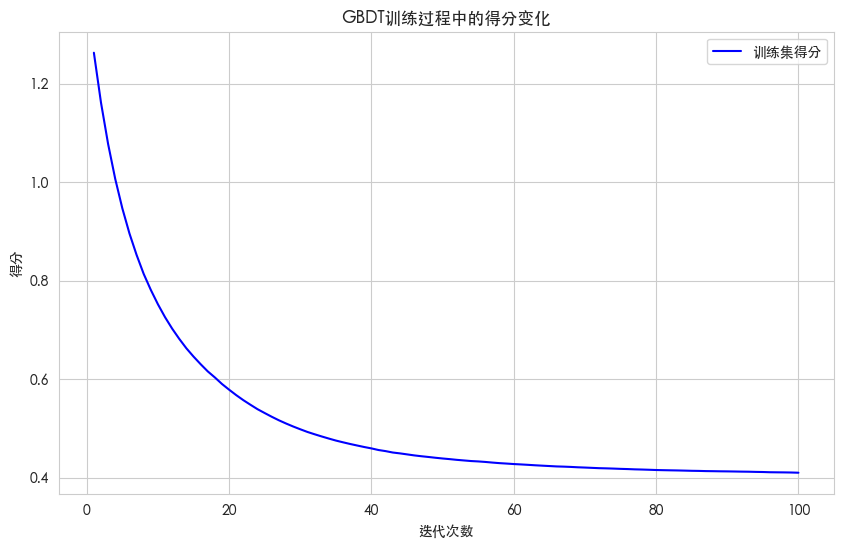

In [30]:
# 导入梯度提升决策树分类器
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

# 创建GBDT分类器
gbdt_clf = GradientBoostingClassifier(
    n_estimators=100,           # 弱分类器的数量
    learning_rate=0.1,          # 学习率
    max_depth=3,                # 决策树的最大深度
    min_samples_split=2,        # 分裂内部节点所需的最小样本数
    min_samples_leaf=1,         # 叶节点所需的最小样本数
    subsample=1.0,              # 用于拟合各个基础学习器的样本比例
    random_state=42             # 随机种子，确保结果可复现
)

# 训练GBDT分类器
gbdt_clf.fit(X_train, y_train)

# 预测
gbdt_pred = gbdt_clf.predict(X_test)
gbdt_accuracy = accuracy_score(y_test, gbdt_pred)

print("GBDT集成准确率:", gbdt_accuracy)

# 绘制GBDT的训练过程中的损失函数变化
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(gbdt_clf.train_score_) + 1), gbdt_clf.train_score_, 'b-', label='训练集得分')
plt.xlabel('迭代次数')
plt.ylabel('得分')
plt.title('GBDT训练过程中的得分变化')
plt.legend()
plt.grid(True)
plt.show()
